# Widefield tutorial

This tutorial demonstraces how to access the *Widefield dataset* using `pynwb`. 

This dataset contains the Widefield imaging data, behavior measurements from the ViRMEN system and pose estimation data from LightningPose.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Imaging](#access-imaging)
- [Access Behavior](#access-behavior)
- [View NWB files](#view-nwb)

![Alt text](data_types_eyetracking.png)

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [1]:
from pynwb import NWBHDF5IO

# The file path to a .nwb file
nwbfile_path = "/Users/weian/data/210944/sub-Cherry/sub-Cherry_ses-20230802-20hz-1_behavior+image+ophys.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/weian/data/210944/sub-Cherry/sub-Cherry_ses-20230802-20hz-1_behavior+image+ophys.nwb', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Access subject and task related metadata <a name="access-subject"></a>

## Access subject metadata

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [2]:
nwbfile.subject

subject abc.SubjectExtension at 0x5404426064
Fields:
  age: P7D
  age__reference: birth
  sex: U
  species: Mus musculus
  subject_id: Cherry

## Access ViRMEN experimental metadata (mazes table, stimulus protocol parameters)

This section demonstrates how to access the task related metadata in an NWB file.

The ViRMEN experimental metadata is stored in a [LabMetaData](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.LabMetaData) extension ([ndx-pinto-metadata](https://github.com/catalystneuro/ndx-pinto-metadata)). 

The LabMetaData](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.LabMetaData) object can be accessed as `nwbfile.lab_meta_data["LabMetaData"]`.

The parameters for the mazes is added to the `mazes` table within `nwbfile.lab_meta_data["LabMetaData"]` which can be accessed as `nwbfile.lab_meta_data["LabMetaData"].mazes`. 

Data arrays are read passively from the file. Accessing the data attribute of the `mazes` object does not read the data values, but presents an HDF5 object that can be indexed to read data. You can use the [:] operator to read the entire data array into memory as `nwbfile.lab_meta_data["LabMetaData"].mazes[:]`.

In [3]:
nwbfile.lab_meta_data["LabMetaData"]

LabMetaData abc.LabMetaDataExtension at 0x5402912016
Fields:
  advance: 0
  experiment_code: TowersTaskSwitch
  experiment_name: TowersTaskSwitch
  mazes: mazes <class 'abc.MazeExtension'>
  num_iterations: 492943
  num_trials: 306
  rig: VR_Widefield
  session_duration: 4452.0290263
  session_index: 9
  stimulus_protocol: stimulus_protocol <class 'hdmf.common.table.DynamicTable'>
  surface_quality: 76.0
  total_reward: 1.464000000000001

In [4]:
nwbfile.lab_meta_data["LabMetaData"].mazes[:]

,lStart,lCue,lMemory,lContext,turnHint,hideHintUntil,cueDuration,cueVisibleAt,cueProbability,cueDensityPerM,...,numSessions,numTrials,numTrialsPerMin,performance,warmupBias,warmupMaxNTrials,warmupMaze,warmupMotor,warmupNTrials,warmupPerform
id,,,,,,,,,,,,,,,,,,,,,
0,5,45,10,10,1,-15,NaN,10,inf,3,...,0,10,2,0.00,[nan],[nan],[nan],[nan],[nan],[nan]
1,30,100,20,20,1,-50,NaN,10,inf,3,...,0,40,2,0.00,[nan],[nan],[nan],[nan],[nan],[nan]
2,30,190,20,30,1,-60,NaN,10,inf,3,...,0,80,2,0.60,[nan],[nan],[nan],[nan],[nan],[nan]
3,30,230,20,50,1,0,NaN,10,inf,4,...,2,80,2,0.90,[nan],[nan],[nan],[nan],[nan],[nan]
4,30,230,20,50,0,0,NaN,10,inf,4,...,1,80,2,0.80,[0.1],[60.0],[4.0],[0.0],[30.0],[0.8]
5,30,190,60,50,0,0,NaN,10,inf,4,...,1,80,2,0.80,[0.1],[60.0],[4.0],[0.0],[30.0],[0.8]
6,30,150,100,50,0,0,NaN,10,inf,4,...,1,80,2,0.80,[0.1],[60.0],[4.0],[0.0],[30.0],[0.8]
7,30,150,100,50,0,0,NaN,10,2.5,4,...,1,80,2,0.75,"[0.1, 0.1]","[20.0, 30.0]","[4.0, 7.0]","[0.75, 0.75]","[10.0, 15.0]","[0.85, 0.8]"
8,30,150,100,50,0,0,NaN,10,1.6,4,...,1,80,2,0.70,[0.1],[20.0],[4.0],[0.75],[10.0],[0.85]


In [5]:
nwbfile.lab_meta_data["LabMetaData"].stimulus_protocol[:]

,numMazesInProtocol,trialDraw,stimDraw,cueMinSeparation,totalRepeatProbability,numRepeatTrials,visualcolor,memorycolor,princetonImplementation,stimulus_code
id,,,,,,,,,,
0,11,EradeCapped,LeftOneOnly,12,0.1,2,"[0, 0, 1]","[0.5, 0.5, 0.0]",1,TowersTaskSwitchStimulusTrain


## Access trials

Behavior trials are stored in `nwbfile.trials`. The `start_time` denotes the start time of each trial in seconds relative to the global session start time (using the "StartOfTrial" column from ViRMEN `.mat` file).
The `stop_time` denotes the end time of each trial in seconds relative to the global session start time
(using the "EndOfTrial" column from the ViRMEN `.mat` file).

`nwbfile.trials` can be converted to a pandas DataFrame for convenient analysis using `nwbfile.trials.to_dataframe`.


In [6]:
trials = nwbfile.trials.to_dataframe()

trials[:10]

,start_time,stop_time,InterTrial,SetupTrial,InitializeTrial,WithinTrial,WithinContext,WithinCue,WithinDelay,WithinArms,...,nDistract,posSalient,posDistract,startIdx,mazeID,mainMazeID,distanceTraveled,excessTravel,rewardFactor,reward
id,,,,,,,,,,,,,,,,,,,,,
0,1.178906,9.596372,10.908935,0.000000,0.000000,8.117211,2.058189,2.816652,7.650318,8.125384,...,0,"[165.67630163696134, 186.4187546596827, 198.61...",[nan],1.0,4.0,11.0,351.825939,-0.163315,1.5,1.0
1,13.321705,21.430266,22.743399,10.934851,13.284197,19.609769,13.892660,14.534308,19.101374,19.618094,...,0,"[112.82786459433574, 132.5928411374275, 148.53...",[nan],1349.0,4.0,11.0,353.047367,-0.160411,1.5,1.0
2,24.869376,32.588712,33.902981,22.768731,24.835361,31.777789,25.443764,26.152207,31.127568,31.786056,...,0,"[82.76278084491057, 99.14269598847437, 122.033...",[nan],2682.0,4.0,11.0,346.343526,-0.176353,1.5,1.0
3,36.015102,44.170778,45.478966,33.931094,35.994768,43.362166,36.620065,37.319885,42.478765,43.370727,...,0,"[117.42399798307711, 129.87211688493963, 150.9...",[nan],3969.0,4.0,11.0,347.472572,-0.173668,1.5,1.0
4,47.606708,55.806572,57.121665,45.509953,47.570756,54.979906,48.254449,49.058718,54.254747,54.988171,...,0,"[224.72197177116794, 54.11126905206174, 68.003...",[nan],5308.0,4.0,11.0,346.061143,-0.177025,1.5,1.0
5,59.273517,67.203886,68.514797,57.170287,59.247024,66.014335,59.888764,60.655445,65.480803,66.022641,...,0,"[173.98256073792223, 215.22258197909468, 30.26...",[nan],6551.0,4.0,11.0,350.794470,-0.165768,1.5,1.0
6,70.617873,79.302931,80.615581,68.556839,70.606323,77.740317,71.706435,72.523189,77.240255,77.748641,...,0,"[150.7509710713166, 167.20899530915938, 22.913...",[nan],7863.0,4.0,11.0,353.952563,-0.158258,1.5,1.0
7,82.711074,91.170158,92.483399,80.654425,82.699117,89.733159,83.382625,84.132582,89.191417,89.741493,...,0,"[198.98371498529443, 212.57025625787162, 228.3...",[nan],9267.0,4.0,11.0,352.147011,-0.162552,1.5,1.0
8,94.586271,103.205474,104.518216,92.525525,94.575245,102.009605,95.750445,96.492136,101.534232,102.017804,...,0,"[126.6733528087612, 143.49826138294958, 159.99...",[nan],10644.0,4.0,11.0,350.394682,-0.166719,1.5,1.0


In [7]:
trials[trials["trial_type"] == "right"][:3]

,start_time,stop_time,InterTrial,SetupTrial,InitializeTrial,WithinTrial,WithinContext,WithinCue,WithinDelay,WithinArms,...,nDistract,posSalient,posDistract,startIdx,mazeID,mainMazeID,distanceTraveled,excessTravel,rewardFactor,reward
id,,,,,,,,,,,,,,,,,,,,,
2,24.869376,32.588712,33.902981,22.768731,24.835361,31.777789,25.443764,26.152207,31.127568,31.786056,...,0,"[82.76278084491057, 99.14269598847437, 122.033...",[nan],2682.0,4.0,11.0,346.343526,-0.176353,1.5,1.0
3,36.015102,44.170778,45.478966,33.931094,35.994768,43.362166,36.620065,37.319885,42.478765,43.370727,...,0,"[117.42399798307711, 129.87211688493963, 150.9...",[nan],3969.0,4.0,11.0,347.472572,-0.173668,1.5,1.0
4,47.606708,55.806572,57.121665,45.509953,47.570756,54.979906,48.254449,49.058718,54.254747,54.988171,...,0,"[224.72197177116794, 54.11126905206174, 68.003...",[nan],5308.0,4.0,11.0,346.061143,-0.177025,1.5,1.0


# Access Widefield Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw and processed Widefield imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw Widefield Imaging

The raw Widefield imaging data is stored in `pynwb.ophys.OnePhotonSeries` objects (blue and violet separately) which is added to `nwbfile.acquisition`. The blue frames can be accessed as `nwbfile.acquisition['OnePhotonSeriesBlue']`, the violet frames as `nwbfile.acquisition['OnePhotonSeriesViolet']`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [7]:
photon_series_blue = nwbfile.acquisition['OnePhotonSeriesBlue']
photon_series_violet = nwbfile.acquisition['OnePhotonSeriesViolet']

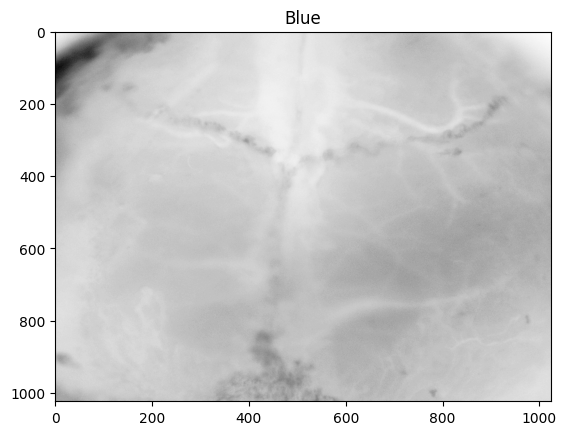

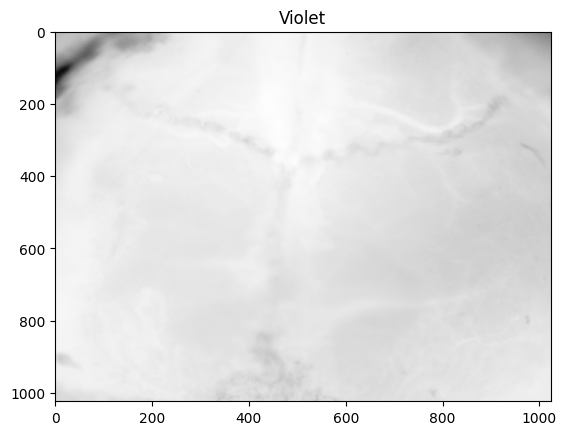

In [8]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(photon_series_blue.data[50].T, aspect="auto", cmap="Greys")
plt.title("Blue")
plt.show()

plt.imshow(photon_series_violet.data[50].T, aspect="auto", cmap="Greys")
plt.title("Violet")
plt.show()


The timestamps for the blue frames can be accessed as `nwbfile.acquisition['OnePhotonSeriesBlue'].timestamps`.

The blue frame timestamps that are aligned with the behavior clock are added from the `wf_behav_sync.mat` file.
The violet frame timestamps are aligned to the blue frame timestamps by interpolation.

In [9]:
photon_series_blue.timestamps[:100]

array([ 1.26787198,  1.36761177,  1.46734154,  1.56707144,  1.66780126,
        1.76753116,  1.86727095,  1.96803081,  2.06773067,  2.16746044,
        2.26819038,  2.3689301 ,  2.46865988,  2.56838989,  2.66811967,
        2.76784945,  2.86758924,  2.96831918,  3.06807899,  3.16777873,
        3.26851869,  3.36824846,  3.46797824,  3.56870818,  3.66843796,
        3.76817775,  3.86890769,  3.96863747,  4.06904745,  4.16877699,
        4.268507  ,  4.36823702,  4.46896648,  4.56870651,  4.66861629,
        4.76880646,  4.868536  ,  4.96926594,  5.06906557,  5.16879559,
        5.2685256 ,  5.36947536,  5.46924496,  5.56923485,  5.66900492,
        5.76973438,  5.8694644 ,  5.96919441,  6.06893396,  6.16965389,
        6.26939392,  6.36912346,  6.46885347,  6.56958342,  6.66932297,
        6.76905298,  6.86978292,  6.9695425 ,  7.07021236,  7.16997242,
        7.26971197,  7.36959219,  7.46933174,  7.56963158,  7.66934156,
        7.77010155,  7.86980104,  7.96954107,  8.070261  ,  8.17

The processed imaging data is stored in the "ophys" processing module, which can be accessed as `nwbfile.processing["ophys"]`.

In [10]:
nwbfile.processing["ophys"]

ophys pynwb.base.ProcessingModule at 0x5398604048
Fields:
  data_interfaces: {
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    MotionCorrectionSeriesBlue <class 'pynwb.base.TimeSeries'>,
    MotionCorrectionSeriesViolet <class 'pynwb.base.TimeSeries'>,
    OnePhotonSeriesProcessedBlue <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesProcessedViolet <class 'pynwb.ophys.OnePhotonSeries'>,
    SegmentationImages <class 'pynwb.base.Images'>,
    SegmentationImagesBlue <class 'pynwb.base.Images'>,
    SegmentationImagesProcessedViolet <class 'pynwb.base.Images'>
  }
  description: No description.

## Motion Correction

The x,y shifts for the blue and violet frames is added as [TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) objects.

The motion correction series for the blue frames can be accessed as `nwbfile.processing["ophys"]["MotionCorrectionSeriesBlue"]`.

The timestamps for the motion correction series references the same timestamps as for the raw imaging data.

In [11]:
motion_correction_blue = nwbfile.processing["ophys"]["MotionCorrectionSeriesBlue"]
motion_correction_blue

MotionCorrectionSeriesBlue pynwb.base.TimeSeries at 0x5404557200
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (100, 2), type "<u2">
  description: The x, y shifts for the OnePhotonSeriesBlue imaging data.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (100,), type "<f8">
  timestamps_unit: seconds
  unit: px

In [12]:
motion_correction_blue.data[:10], motion_correction_blue.timestamps[:10]

(array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]], dtype=uint16),
 array([1.26787198, 1.36761177, 1.46734154, 1.56707144, 1.66780126,
        1.76753116, 1.86727095, 1.96803081, 2.06773067, 2.16746044]))

## Processed Widefield Imaging

The downsampled imaging data for the blue frames can accessed as `nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"]`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

The binned image size is (128, 128) which can be accessed with the "dimension" attribute in `nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"]`.

In [13]:
nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"]

OnePhotonSeriesProcessedBlue pynwb.ophys.OnePhotonSeries at 0x5403480720
Fields:
  binning: 64
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (100, 128, 128), type "<u2">
  description: Processed imaging data from one-photon excitation microscopy.
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  imaging_plane: ImagingPlaneBlue pynwb.ophys.ImagingPlane at 0x5402903952
Fields:
  conversion: 1.0
  description: The plane or volume being imaged by the microscope.
  device: Microscope pynwb.device.Device at 0x5390477776
  excitation_lambda: nan
  imaging_rate: 10.0
  indicator: unknown
  location: unknown
  optical_channel: (
    OpticalChannelBlue <class 'pynwb.ophys.OpticalChannel'>
  )
  unit: meters

  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (100,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

In [14]:
nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"].dimension[:]

array([128, 128])

## Accessing the segmentation data

The segmentation output for the Widefield Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the processed [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data (blue frames) as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationProcessedBlue"]`.


In [15]:
plane_segmentation = nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationProcessedBlue"][:]
plane_segmentation[:10]

,image_mask,ROICentroids,Accepted,Rejected,location
id,,,,,
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[17.730841121495327, 113.33084112149533]",1,0,VISp-L
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[111.14313534566699, 113.95326192794548]",1,0,VISp-R
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[35.276018099547514, 109.09049773755656]",1,0,VISpm-L
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[93.66968325791855, 109.18552036199095]",1,0,VISpm-R
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[34.28888888888889, 92.92888888888889]",1,0,VISam-L
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[94.95633187772926, 93.66812227074236]",1,0,VISam-R
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[26.410958904109588, 84.59726027397261]",1,0,VISa-L
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[103.2663043478261, 85.61413043478261]",1,0,VISa-R
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[6.7844311377245505, 93.83233532934132]",1,0,VISrl-L


The summary images of the segmentation are stored in [Images](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.Images) container in NWB. 

The manual mask and contrast based vasculature mask for the blue channel (full size image) can be accessed 
as `nwbfile.processing["ophys"]["SegmentationImagesBlue"]`.


In [16]:
images_blue = nwbfile.processing["ophys"]["SegmentationImagesBlue"]
images_blue

SegmentationImagesBlue pynwb.base.Images at 0x5405752208
Fields:
  description: Contains the manual mask and the contrast based vasculature mask for the blue channel in the full size session image.
  images: {
    manual <class 'pynwb.image.GrayscaleImage'>,
    vasculature <class 'pynwb.image.GrayscaleImage'>
  }

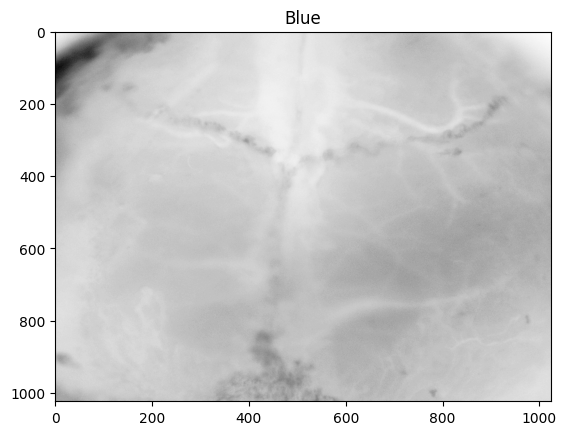

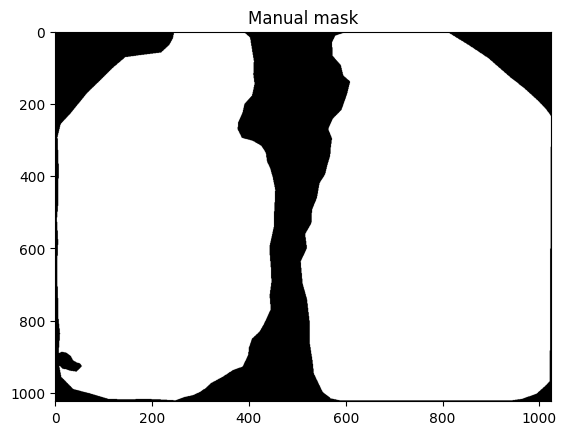

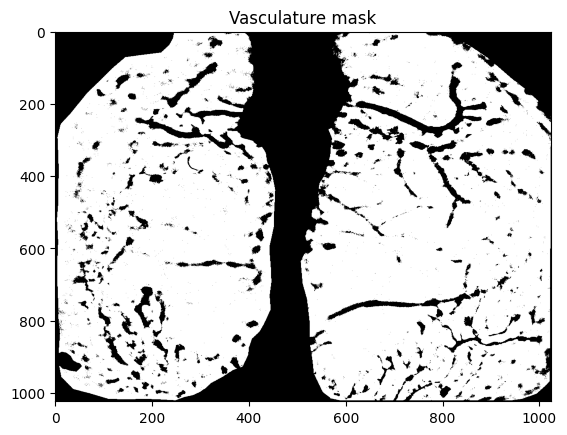

In [17]:
plt.imshow(photon_series_blue.data[50].T, aspect="auto", cmap="Greys")
plt.title("Blue")
plt.show()

plt.imshow(images_blue.images["manual"].data[:].T, aspect="auto", cmap="Greys")
plt.title("Manual mask")
plt.show()

plt.imshow(images_blue.images["vasculature"].data[:].T, aspect="auto", cmap="Greys")
plt.title("Vasculature mask")
plt.show()

The PCA mask and the vasculature mask for the blue channel on the binned session image can be accessed from 
`nwbfile.processing["ophys"]["SegmentationImages"]`.

In [19]:
nwbfile.processing["ophys"]["SegmentationImages"]

SegmentationImages pynwb.base.Images at 0x6073815888
Fields:
  description: The summary images of the segmentation.
  images: {
    pca_blue <class 'pynwb.image.GrayscaleImage'>,
    vasculature <class 'pynwb.image.GrayscaleImage'>
  }

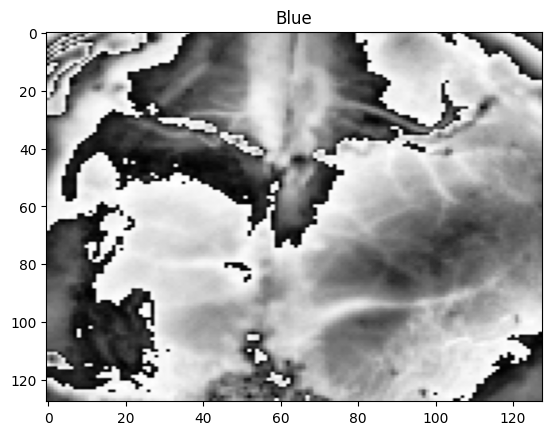

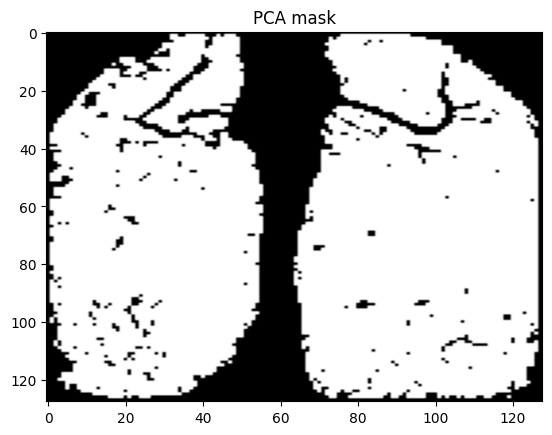

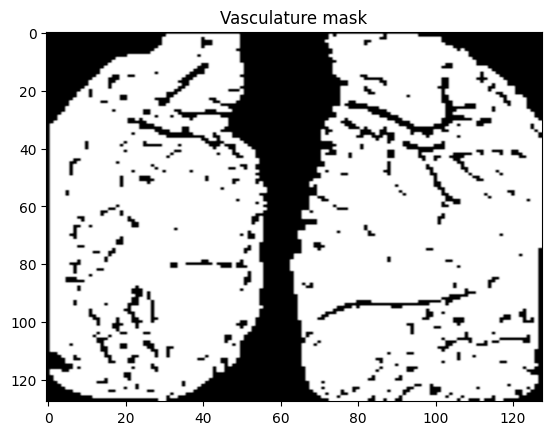

In [18]:
images_blue = nwbfile.processing["ophys"]["SegmentationImages"]

plt.imshow(nwbfile.processing["ophys"]["OnePhotonSeriesProcessedBlue"].data[50].T, aspect="auto", cmap="Greys")
plt.title("Blue")
plt.show()

plt.imshow(images_blue.images["pca_blue"].data[:].T, aspect="auto", cmap="Greys")
plt.title("PCA mask")
plt.show()

plt.imshow(images_blue.images["vasculature"].data[:].T, aspect="auto", cmap="Greys")
plt.title("Vasculature mask")
plt.show()

The PCA mask for the violet channel on the binned session image can be accessed from 
`nwbfile.processing["ophys"]["SegmentationImagesProcessedViolet"]`

In [19]:
images_violet = nwbfile.processing["ophys"]["SegmentationImagesProcessedViolet"]
images_violet

SegmentationImagesProcessedViolet pynwb.base.Images at 0x5402005584
Fields:
  description: Contains the PCA mask for the violet channel on the binned session image.
  images: {
    pca_violet <class 'pynwb.image.GrayscaleImage'>
  }

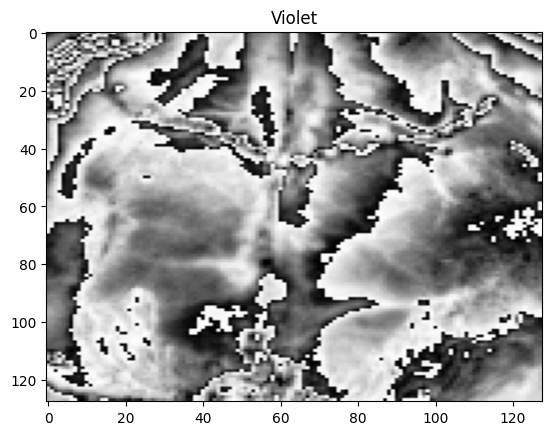

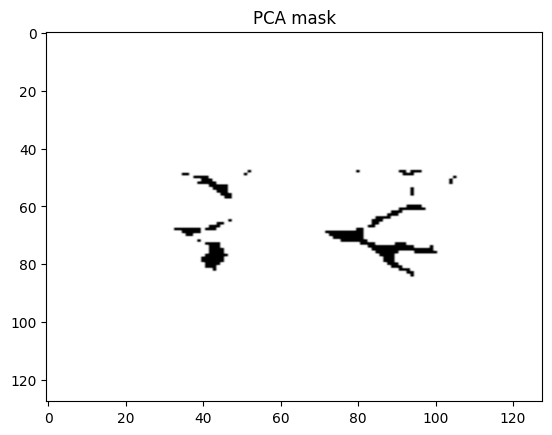

In [20]:
plt.imshow(nwbfile.processing["ophys"]["OnePhotonSeriesProcessedViolet"].data[50].T, aspect="auto", cmap="Greys")
plt.title("Violet")
plt.show()

plt.imshow(images_violet.images["pca_violet"].data[:].T, aspect="auto", cmap="Greys")
plt.title("PCA mask")
plt.show()

# Access Behavior <a name="access-behavior"></a>

This section demonstrates how to access behavioral data from the [pynwb.behavior](https://pynwb.readthedocs.io/en/stable/pynwb.behavior.html#module-pynwb.behavior) module.

The behavior data is stored in the "behavior" processing module, which can be accessed as `nwbfile.processing["behavior"]`.


In [21]:
nwbfile.processing["behavior"]

behavior pynwb.base.ProcessingModule at 0x5403972112
Fields:
  data_interfaces: {
    ImageSeriesLabeledVideo <class 'pynwb.image.ImageSeries'>,
    PoseEstimation <class 'abc.PoseEstimation'>,
    Position <class 'pynwb.behavior.Position'>,
    SensorDots <class 'pynwb.base.TimeSeries'>,
    SensorDotsByImFrame <class 'pynwb.base.TimeSeries'>,
    TTLs <class 'abc.AnnotatedEventsTable'>,
    Velocity <class 'pynwb.base.TimeSeries'>,
    VelocityByImFrame <class 'pynwb.base.TimeSeries'>,
    VelocityGain <class 'pynwb.base.TimeSeries'>,
    ViewAngle <class 'pynwb.behavior.CompassDirection'>,
    licks <class 'pynwb.base.TimeSeries'>
  }
  description: contains processed behavioral data

## Access Position

[SpatialSeries](https://pynwb.readthedocs.io/en/stable/pynwb.behavior.html#pynwb.behavior.SpatialSeries) is a subclass of [TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) that represents data in space, such as the spatial direction, e.g., of gaze or travel, or position of an animal over time.

The x, y (z) position of the animal is stored stored in `SpatialSeries` object inside the [Position](https://pynwb.readthedocs.io/en/stable/pynwb.behavior.html#pynwb.behavior.Position) container.

The Position container can be accessed as `nwbfile.processing["behavior"]["Position"]`.

In [22]:
nwbfile.processing["behavior"]["Position"]

Position pynwb.behavior.Position at 0x5403491088
Fields:
  spatial_series: {
    SpatialSeries <class 'pynwb.behavior.SpatialSeries'>,
    SpatialSeriesByImFrame <class 'pynwb.behavior.SpatialSeries'>
  }

The x, y, z position of the animal by ViRMEN iteration can be accessed as `nwbfile.processing["behavior"]["Position"]["SpatialSeries"]`.

In [23]:
position_by_virmen = nwbfile.processing["behavior"]["Position"]["SpatialSeries"]
position_by_virmen

SpatialSeries pynwb.behavior.SpatialSeries at 0x5396441552
Fields:
  comments: no comments
  conversion: 0.01
  data: <HDF5 dataset "data": shape (492943, 3), type "<f8">
  description: The x, y, z position of the animal by ViRMEN iteration.
  interval: 1
  offset: 0.0
  reference_frame: (0,0) is the start of the 'sample' region (or 'cue' region) which varies by maze and task.
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (492943,), type "<f8">
  timestamps_unit: seconds
  unit: meters

The x, y, position of the animal averaged over the iterations for each frame can be accessed as `nwbfile.processing["behavior"]["Position"]["SpatialSeriesByImFrame"]`.

In [24]:
position_by_frame = nwbfile.processing["behavior"]["Position"]["SpatialSeriesByImFrame"]
position_by_frame

SpatialSeriesByImFrame pynwb.behavior.SpatialSeries at 0x5399135824
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (42000, 2), type "<f4">
  description: The position of the animal averaged over the iterations for each frame.
  interval: 1
  offset: 0.0
  reference_frame: (0,0) is the start of the 'sample' region (or 'cue' region) which varies by maze and task.
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (42000,), type "<f8">
  timestamps_unit: seconds
  unit: meters

The "SpatialSeriesByImFrame" has the same time basis as the imaging data (blue frames):

In [25]:
position_by_frame.timestamps.shape, photon_series_blue.timestamps.shape,

((42000,), (100,))

# Access Eye Tracking <a name="access-eyetracking"></a>

This section demonstrates how to access the pose estimation data acquired from Lightning Pose.

The original video is added as [ImageSeries](https://pynwb.readthedocs.io/en/stable/pynwb.image.html#pynwb.image.ImageSeries) with *external* mode. In external mode the video data is not stored in NWB, instead we use [external links](https://www.dandiarchive.org/2022/03/03/external-links-organize.html) to video files using a relative path to that file on disk. In this case the `data` attribute of [ImageSeries](https://pynwb.readthedocs.io/en/stable/pynwb.image.html#pynwb.image.ImageSeries) is empty, instead we have `external_file` attribute:

In [33]:
nwbfile.acquisition['ImageSeriesOriginalVideo']

ImageSeriesOriginalVideo pynwb.image.ImageSeries at 0x5404556432
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (0, 0, 0), type "|u1">
  description: The original video used for pose estimation.
  external_file: <StrDataset for HDF5 dataset "external_file": shape (1,), type "|O">
  format: external
  interval: 1
  offset: 0.0
  resolution: -1.0
  starting_frame: [0]
  timestamps: <HDF5 dataset "timestamps": shape (133076,), type "<f8">
  timestamps_unit: seconds
  unit: Frames

In [34]:
nwbfile.acquisition['ImageSeriesOriginalVideo'].external_file[:][0]

'sub-Cherry_ses-20230802-20hz-1_behavior+image+ophys/d8a030ba-24cb-46e1-ae6b-40a9e20376e6_external_file_0.mp4'

Similarly to the original video, the labeled video (if available) is also added as [ImageSeries](https://pynwb.readthedocs.io/en/stable/pynwb.image.html#pynwb.image.ImageSeries) with *external* mode.

The labeled video is added to the "behavior" processing module and can be accessed as `nwbfile.processing["behavior"]["ImageSeriesLabeledVideo"]`.

In [37]:
nwbfile.processing["behavior"]["ImageSeriesLabeledVideo"]

ImageSeriesLabeledVideo pynwb.image.ImageSeries at 0x5398245776
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (0, 0, 0), type "|u1">
  description: The video recorded by camera with the pose estimation labels.
  external_file: <StrDataset for HDF5 dataset "external_file": shape (1,), type "|O">
  format: external
  interval: 1
  offset: 0.0
  resolution: -1.0
  starting_frame: [0]
  timestamps: <HDF5 dataset "timestamps": shape (133076,), type "<f8">
  timestamps_unit: seconds
  unit: Frames

To store the pose estimation data in NWB, we are using an NWB extension [ndx-pose](https://github.com/rly/ndx-pose). The `PoseEstimation` container stores the estimated position data (`PoseEstimationSeries`) for multiple body parts computed from the original video.

We can access `PoseEstimation` as `nwbfile.processing["behavior"]["PoseEstimation"]`.

In [39]:
nwbfile.processing["behavior"]["PoseEstimation"]

PoseEstimation abc.PoseEstimation at 0x5398238928
Fields:
  description: Contains the pose estimation series for each keypoint.
  dimensions: <HDF5 dataset "dimensions": shape (1, 2), type "<u8">
  labeled_videos: <StrDataset for HDF5 dataset "labeled_videos": shape (1,), type "|O">
  original_videos: <StrDataset for HDF5 dataset "original_videos": shape (1,), type "|O">
  pose_estimation_series: {
    PoseEstimationSeriesDRpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesDpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesLDpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesLpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesRVpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesRpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesVLpupil <class 'abc.PoseEstimationSeries'>,
    PoseEstimationSeriesVpupil <class 'abc.PoseEstimationSeries'>
  }
  scorer: heatmap_tracker
  source_software: LightningPose

The `PoseEstimationSeries` stores the estimated positions (x, y) of a body part over time as well as the confidence of the estimated positions.

In [40]:
nwbfile.processing["behavior"]["PoseEstimation"].pose_estimation_series

{'PoseEstimationSeriesDRpupil': PoseEstimationSeriesDRpupil abc.PoseEstimationSeries at 0x5396499408
 Fields:
   comments: no comments
   confidence: <HDF5 dataset "confidence": shape (10,), type "<f8">
   conversion: 1.0
   data: <HDF5 dataset "data": shape (10, 2), type "<f8">
   description: The estimated position (x, y) of DRpupil over time.
   offset: 0.0
   rate: 29.999860118404552
   reference_frame: (0,0) corresponds to the top left corner of the video.
   resolution: -1.0
   starting_time: 1.1928867
   starting_time_unit: seconds
   unit: px,
 'PoseEstimationSeriesDpupil': PoseEstimationSeriesDpupil abc.PoseEstimationSeries at 0x5396701520
 Fields:
   comments: no comments
   confidence: <HDF5 dataset "confidence": shape (10,), type "<f8">
   conversion: 1.0
   data: <HDF5 dataset "data": shape (10, 2), type "<f8">
   description: The estimated position (x, y) of Dpupil over time.
   offset: 0.0
   rate: 29.999860118404552
   reference_frame: (0,0) corresponds to the top left 

In [41]:
nwbfile.processing["behavior"]["PoseEstimation"]["PoseEstimationSeriesDRpupil"]

PoseEstimationSeriesDRpupil abc.PoseEstimationSeries at 0x5396499408
Fields:
  comments: no comments
  confidence: <HDF5 dataset "confidence": shape (10,), type "<f8">
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10, 2), type "<f8">
  description: The estimated position (x, y) of DRpupil over time.
  offset: 0.0
  rate: 29.999860118404552
  reference_frame: (0,0) corresponds to the top left corner of the video.
  resolution: -1.0
  starting_time: 1.1928867
  starting_time_unit: seconds
  unit: px

In [48]:
nwbfile.processing["behavior"]["PoseEstimation"]["PoseEstimationSeriesDRpupil"].data[:10]

array([[307.67617798, 256.01553345],
       [306.49752808, 256.07485962],
       [306.6043396 , 255.96765137],
       [306.89477539, 255.9553833 ],
       [306.75372314, 255.9178772 ],
       [306.65887451, 256.2265625 ],
       [306.50668335, 256.17654419],
       [306.09283447, 255.82965088],
       [306.29681396, 255.84490967],
       [306.6187439 , 255.67315674]])

In [47]:
nwbfile.processing["behavior"]["PoseEstimation"]["PoseEstimationSeriesDRpupil"].confidence[:10]

array([0.99946105, 0.99372149, 0.99975336, 0.99952281, 0.99965835,
       0.99943811, 0.99954474, 0.99937731, 0.99814886, 0.99989527])

In [49]:
from nwbwidgets import nwb2widget

nwb2widget(nwbfile)

We also use [Neurosift](https://github.com/flatironinstitute/neurosift), a platform for the visualization of neuroscience data in the web browser.